# Question 8

* A program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image, which can handle
1. nearest-neighbor, and
2. bilinear interpolation.

In [11]:
#Importing the libraries
import cv2 as cv 
import numpy as np

In [12]:
# Zooming using nearest neighbor neighbour
def zoom_nearest_neighbor(image, zoom_factor):
    
    new_height = int(image.shape[0] * zoom_factor)
    new_width = int(image.shape[1] * zoom_factor)
    
    # Create the zoomed image with the new dimensions
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)


    # Fill in the values of the zoomed image
    for i in range(new_height):
        for j in range(new_width):
            # Find the nearest neighbor for each pixel
            y = int(i / zoom_factor)
            x = int(j / zoom_factor)

            # Assign the nearest neighbor to the zoomed image
            zoomed_image[i, j] = image[y, x]
    
    return zoomed_image


In [13]:
# Zooming using bilinear interpolation
def zoom_bilinear_interpolation(image, zoom_factor):
    new_height = int(image.shape[0] * zoom_factor)
    new_width = int(image.shape[1] * zoom_factor)

    # Create the zoomed image with the new dimensions
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    # Fill in the values of the zoomed image
    for i in range(new_height):
        for j in range(new_width):
            y = i / zoom_factor
            x = j / zoom_factor
            
            # Find the nearest neighbors of the pixel
            y_low = int(np.floor(y))
            y_high = min(y_low + 1, image.shape[0] - 1)
            x_low = int(np.floor(x))
            x_high = min(x_low + 1, image.shape[1] - 1)
            
            # Calculate the interpolation weights
            dy = y - y_low
            dx = x - x_low
            
            # Interpolate the pixel value
            for c in range(3):
                interpolated_value = (1 - dx) * (1 - dy) * image[y_low, x_low, c] + \
                                     dx * (1 - dy) * image[y_low, x_high, c] + \
                                     (1 - dx) * dy * image[y_high, x_low, c] + \
                                     dx * dy * image[y_high, x_high, c]
                zoomed_image[i, j, c] = int(interpolated_value)
    
    return zoomed_image

In [14]:
# Load the image
image = cv.imread("W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/zooming/im06small.png", cv.IMREAD_COLOR)
print('Properties of the original image:',image.shape)

# Define the zoom factor
zoom_factor = 4  # Adjust this value as needed
print('Zoom factor:',zoom_factor)

# Perform zooming using nearest-neighbor and bilinear interpolation
zoomed_nearest = zoom_nearest_neighbor(image, zoom_factor)
zoomed_bilinear = zoom_bilinear_interpolation(image, zoom_factor)

print('Properties of the zoomed image using nearest neighbour:',zoomed_nearest.shape)
print('Properties of the zoomed image using bilinear interpolation:',zoomed_nearest.shape)

# Save the zoomed images
cv.imwrite("W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/zooming/im06_zoomed_nearest.png", zoomed_nearest)
cv.imwrite("W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/zooming/im06_zoomed_bilinear.png", zoomed_bilinear)

Properties of the original image: (270, 480, 3)
Zoom factor: 4
Properties of the zoomed image using nearest neighbour: (1080, 1920, 3)
Properties of the zoomed image using bilinear interpolation: (1080, 1920, 3)


True

In [15]:
# Calculate the normalized SSD between the original and zoomed images
def normalized_ssd(image1, image2):

    # Calculate the sum of squared differences
    diff = image1.astype(np.float32) - image2.astype(np.float32)
    squared_diff = diff ** 2
    sum_squared_diff = np.sum(squared_diff)

    # Normalize the SSD value
    normalized_ssd_value = sum_squared_diff / (image1.shape[0] * image1.shape[1] * image1.shape[2])
    
    return normalized_ssd_value

In [16]:
# Open the Zoomed Images
imag_z_nn = cv.imread("W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/zooming/im06_zoomed_nearest.png",cv.IMREAD_COLOR)
imag_z_bi = cv.imread("W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/zooming/im06_zoomed_bilinear.png",cv.IMREAD_COLOR)

cv.imshow('Zoomed Image using Nearest Neighbour',imag_z_nn)
cv.waitKey(0)
cv.imshow('Zoomed Image using Bilinear Interpolation',imag_z_bi)
cv.waitKey(0)
cv.destroyAllWindows()

# Open the Already Zoomed Image
imag_z = cv.imread("W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/zooming/im06.png",cv.IMREAD_COLOR)
print('Properties of the already zoomed image:',imag_z.shape)

Properties of the already zoomed image: (1080, 1920, 3)


In [17]:
# Calculate normalized SSD
ssd_nearest = normalized_ssd( imag_z_nn,imag_z )
ssd_bilinear = normalized_ssd(imag_z_bi,imag_z)

print('Normalized SSD between the already zoomed and newly zoomed images using nearest neighbour:',ssd_nearest)
print('Normalized SSD between the already zoomed and newly zoomed images using bilinear interpolation:',ssd_bilinear)

Normalized SSD between the already zoomed and newly zoomed images using nearest neighbour: 187.61086419753087
Normalized SSD between the already zoomed and newly zoomed images using bilinear interpolation: 255.48026748971193


Computing the normalized sum of squared difference (SSD) is a common technique used to evaluate the quality of image processing algorithms, especially when it comes to image scaling, resizing, or any other manipulation that involves modifying pixel values. The normalized SSD helps to quantify how much two images differ from each other in terms of pixel values after applying an algorithm.

When comparing an original image with an image obtained through some processing (e.g., scaling, resizing), the normalized SSD provides a measure of how similar or dissimilar the two images are. Here's how it works:

1. **Calculating SSD:** For each corresponding pixel in the two images being compared, compute the squared difference between their pixel values (red, green, and blue values in the case of color images). Square each difference to avoid negative values.

2. **Summing Squared Differences:** Sum up all the squared differences for all corresponding pixels in the images. This gives you the total squared difference between the images.

3. **Normalizing SSD:** Divide the sum of squared differences by the total number of pixels in the images. This normalization step ensures that the SSD value is independent of the image size and allows for meaningful comparisons across different images.

4. **Interpreting Normalized SSD:** A lower normalized SSD indicates that the processed image is closer to the original image in terms of pixel values. A higher normalized SSD means there is more dissimilarity between the images.

By calculating the normalized SSD, you can quantitatively assess the accuracy and quality of your image processing algorithm. It's a way to provide a numerical value that helps you understand how well the processed image matches the original image. This can be useful for optimizing algorithms, selecting appropriate interpolation methods, or comparing different scaling techniques to determine which one produces results that are visually closer to the original image.

* The lower the normalized SSD value, the better the image scaling method preserves the original pixel values, resulting in a more accurate representation of the original image after scaling.

## Reference Codes

Normalized SSD (Nearest Neighbor): 0.0
Normalized SSD (Bilinear Interpolation): 80.60995370370371


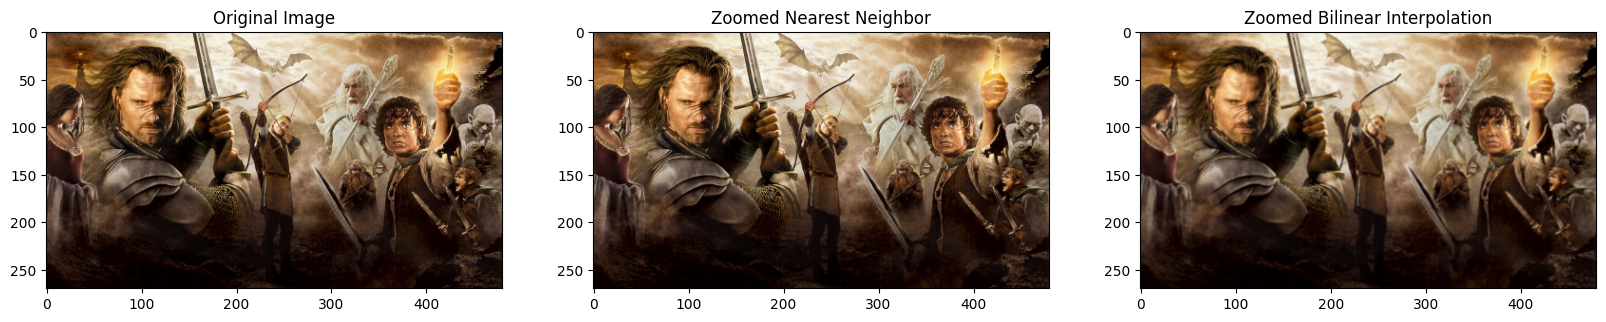

In [10]:
import numpy as np
import cv2

def zoom_nearest_neighbor(image, zoom_factor):
    height, width, channels = image.shape
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    
    zoomed_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            y = int(i / zoom_factor)
            x = int(j / zoom_factor)
            zoomed_image[i, j] = image[y, x]
    
    return zoomed_image

def zoom_bilinear_interpolation(image, zoom_factor):
    height, width, channels = image.shape
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    
    zoomed_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            y = i / zoom_factor
            x = j / zoom_factor
            
            y_low = int(np.floor(y))
            y_high = min(y_low + 1, height - 1)
            x_low = int(np.floor(x))
            x_high = min(x_low + 1, width - 1)
            
            dy = y - y_low
            dx = x - x_low
            
            for c in range(channels):
                interpolated_value = (1 - dx) * (1 - dy) * image[y_low, x_low, c] + \
                                     dx * (1 - dy) * image[y_low, x_high, c] + \
                                     (1 - dx) * dy * image[y_high, x_low, c] + \
                                     dx * dy * image[y_high, x_high, c]
                zoomed_image[i, j, c] = int(interpolated_value)
    
    return zoomed_image

def normalized_ssd(image1, image2):
    diff = image1.astype(np.float32) - image2.astype(np.float32)
    squared_diff = diff ** 2
    sum_squared_diff = np.sum(squared_diff)
    normalized_ssd_value = sum_squared_diff / (image1.shape[0] * image1.shape[1] * image1.shape[2])
    return normalized_ssd_value

# Load the small image
original_image = cv2.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/zooming/im01small.png')

# Define the zoom factor
zoom_factor = 4

# Perform zooming using nearest-neighbor and bilinear interpolation
zoomed_nearest = zoom_nearest_neighbor(original_image, zoom_factor)
zoomed_bilinear = zoom_bilinear_interpolation(original_image, zoom_factor)

# Resize zoomed images to match the original image's dimensions
zoomed_nearest_resized = cv2.resize(zoomed_nearest, (original_image.shape[1], original_image.shape[0]))
zoomed_bilinear_resized = cv2.resize(zoomed_bilinear, (original_image.shape[1], original_image.shape[0]))

# Calculate normalized SSD
ssd_nearest = normalized_ssd(original_image, zoomed_nearest_resized)
ssd_bilinear = normalized_ssd(original_image, zoomed_bilinear_resized)

print(f"Normalized SSD (Nearest Neighbor): {ssd_nearest}")
print(f"Normalized SSD (Bilinear Interpolation): {ssd_bilinear}")

# Display the images (you might need to adjust the display window)
#cv2.imshow('Original Image', original_image)
#cv2.waitKey(0)
#cv2.imshow('Zoomed Nearest Neighbor', zoomed_nearest_resized)
#cv2.waitKey(0)
#cv2.imshow('Zoomed Bilinear Interpolation', zoomed_bilinear_resized)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# plot the images in matplotlib
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))   
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(zoomed_nearest_resized,cv2.COLOR_BGR2RGB))
plt.title('Zoomed Nearest Neighbor')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(zoomed_bilinear_resized,cv2.COLOR_BGR2RGB))
plt.title('Zoomed Bilinear Interpolation')
plt.show()



In [13]:
import cv2
import numpy as np

def zoom_nearest_neighbor(image, zoom_factor):
    
    new_height = int(image.shape[0] * zoom_factor)
    new_width = int(image.shape[1] * zoom_factor)
    print('New Height is :', new_height)
    print('New Width is :', new_width)
    
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            y = int(i / zoom_factor)
            x = int(j / zoom_factor)
            zoomed_image[i, j] = image[y, x]
    
    return zoomed_image

def zoom_bilinear_interpolation(image, zoom_factor):
    new_height = int(image.shape[0] * zoom_factor)
    new_width = int(image.shape[1] * zoom_factor)
    
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            y = i / zoom_factor
            x = j / zoom_factor
            
            y_low = int(np.floor(y))
            y_high = min(y_low + 1, image.shape[0] - 1)
            x_low = int(np.floor(x))
            x_high = min(x_low + 1, image.shape[1] - 1)
            
            dy = y - y_low
            dx = x - x_low
            
            for c in range(3):
                interpolated_value = (1 - dx) * (1 - dy) * image[y_low, x_low, c] + \
                                     dx * (1 - dy) * image[y_low, x_high, c] + \
                                     (1 - dx) * dy * image[y_high, x_low, c] + \
                                     dx * dy * image[y_high, x_high, c]
                zoomed_image[i, j, c] = int(interpolated_value)
    
    return zoomed_image

# Load the image
image = cv2.imread("W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/zooming/im01small.png")

# Define the zoom factor
zoom_factor = 4  # Adjust this value as needed

# Perform zooming using nearest-neighbor and bilinear interpolation
zoomed_nearest = zoom_nearest_neighbor(image, zoom_factor)
zoomed_bilinear = zoom_bilinear_interpolation(image, zoom_factor)

# Save the zoomed images
cv2.imwrite("W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/zooming/zoomed_nearest.jpg", zoomed_nearest)
cv2.imwrite("W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/zooming/zoomed_bilinear.jpg", zoomed_bilinear)


True